# Gravitational orbits in Cartesian coordinates
I plan to use body between earth and satellite to illustrate the gravitational orbits. 

From gravatational's law we have

\begin{equation}
\begin{aligned}
F &= \frac{GMm}{r^2}=\frac{\mu m}{r^2}\\
\end{aligned}
\label{eq:motion_0}
\end{equation}

For a large mass like earth, the mass of satellite could be neglect, then

\begin{equation}
\begin{aligned}
a &=\frac{\mu}{r^2}\\
\end{aligned}
\label{eq:sat}
\end{equation}

in vector form

\begin{equation}
\begin{aligned}
\ddot r &=\frac{\mu}{r^3}r\\
\end{aligned}
\label{eq:satdot}
\end{equation}

in Cartesian Coordinate

\begin{equation}
\begin{aligned}
\ddot x &= -\frac{\mu}{r^3}x\\
\ddot y &= -\frac{\mu}{r^3}y\\
\ddot z &= -\frac{\mu}{r^3}z\\
\end{aligned}
\label{eq:ddot}
\end{equation}

where
\begin{equation}
\begin{aligned}
r^2&=x^2+y^2+z^2\\
\end{aligned}
\label{eq:motion_2}
\end{equation}

In [74]:
# Importing Packages
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from math import *
from ipywidgets import interact
import ipywidgets as widgets
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets

Create class that simulate the orbit.

In [75]:
class Orbit:
    
    """
     initialiate orb=mit with initial condition.
     
    """
    def __init__(self, state_0):
        self.state_0=state_0
        self.x_0 = state_0[0]
        self.y_0 = state_0[0]
        self.z_0 = state_0[0]
        self.vx_0 = state_0[0]
        self.vy_0 = state_0[0]
        self.vz_0 = state_0[0]
    
    
    """
     simulate orbit around earth in Cartesian coordinate
     
    """
    def model_earth(self, state, t):
        mu = 3.986004418E+05 #gravatational parameter of earth
        x = state[0]
        y = state[1]
        z = state[2]
        x_dot = state[3]
        y_dot = state[4]
        z_dot = state[5]
        x_ddot = -mu * x / (x ** 2 + y ** 2 + z ** 2) ** (3 / 2)
        y_ddot = -mu * y / (x ** 2 + y ** 2 + z ** 2) ** (3 / 2)
        z_ddot = -mu * z / (x ** 2 + y ** 2 + z ** 2) ** (3 / 2)
        dstate_dt = [x_dot, y_dot, z_dot, x_ddot, y_ddot, z_ddot]
        return dstate_dt
    
    
    def solve_ode(self, t):
        """
        Solve the ODE given initial conditions.
        Use odeint with the option of specifying the method.
        """
        sol = odeint(self.model_earth, self.state_0, t)

        return sol
    
    def euler_Energy(self):
        """
        calculating and plot the energy using euler method
        """
        DeltaT = 0.01
        tfinal = 100
        n = ceil(tfinal/DeltaT)
        t = np.zeros(n)
        x = np.zeros((n,2))
        y = np.zeros((n,2))

        EKinetic = np.zeros(n)
        EPotential = np.zeros(n)
        ETotal = np.zeros(n)
        x0 = np.array([1.0,0.0])
        y0 = np.array([0.0,2*pi])
        x[0]=x0
        y[0]=y0
        Fourpi2 = 4*pi*pi
        rabs0 = sqrt(sum(x[0]*x[0]))
        EKinetic[0] = 0.5*sum(y0*y0)
        EPotential[0] = -4*pi*pi/rabs0
        ETotal[0] = EPotential[0]+EKinetic[0]
        for i in range(n-1):
            rabs = sqrt(sum(x[i]*x[i]))
            a =  -Fourpi2*x[i]/(rabs**3)
            y[i+1] = y[i] + DeltaT*a
            x[i+1] = x[i] + DeltaT*y[i]
            t[i+1] = t[i] + DeltaT
            EKinetic[i+1] = 0.5*sum(y[i+1]*y[i+1])
            EPotential[i+1] = -4*pi*pi/sqrt(sum(x[i+1]*x[i+1]))
            ETotal[i+1] = EPotential[i+1]+EKinetic[i+1]  

        fig = plt.figure(figsize=(6,6))
        axs = fig.add_subplot(1,1,1)
        axs.plot(t, ETotal)
        axs.set_xlabel('Time [yr]')
        axs.set_ylabel('Total Energy')
        fig.tight_layout()
        plt.show()
    
    def leapfrog_Energy(self):
        """
        calculating and plot the energy using leapfrog method
        """
        DeltaT = 0.01
        tfinal = 100 # in years
        n = ceil(tfinal/DeltaT)
        t = np.zeros(n)
        y = np.zeros((n,2))
        x = np.zeros((n,2))

        EKinetic = np.zeros(n)
        EPotential = np.zeros(n)
        ETotal = np.zeros(n)

        x0 = np.array([1.0,0.0])
        y0 = np.array([0.0,2*pi])
        x[0] = x0
        y[0] = y0
        Fourpi2 = 4*pi*pi
        rabs0 = sqrt(sum(x[0]*x[0]))
        EKinetic[0] = 0.5*sum(y0*y0)
        EPotential[0] = -4*pi*pi/rabs0
        ETotal[0] = EPotential[0]+EKinetic[0]
        for i in range(n-1):
            rabs = sqrt(sum(x[i]*x[i]))
            a =  -Fourpi2*x[i]/(rabs**3)
            y[i+1] = y[i] + DeltaT*a
            x[i+1] = x[i] + DeltaT*y[i+1]
            t[i+1] = t[i] + DeltaT
            EKinetic[i+1] = 0.5*sum(y[i+1]*y[i+1])
            EPotential[i+1] = -4*pi*pi/sqrt(sum(x[i+1]*x[i+1]))
            ETotal[i+1] = EPotential[i+1]+EKinetic[i+1]
        
        fig = plt.figure(figsize=(6,6))
        axs = fig.add_subplot(1,1,1)
        axs.plot(t, ETotal)
        axs.set_ylim(-30,-10)
        axs.set_xlabel('Time [yr]')
        axs.set_ylabel('Total Energy')

        fig.tight_layout()
        plt.show()
    
    def energy(self, t_pts, r, r_dot):
        """Evaluate the energy as a function of time"""
        return (self.mu/2.) * (self.vx_0^2+self.vy_0^2+self.vz_0^2)

Using the function with initial condition, and a time array.

In [76]:
# Initial Conditions for the first satellite
x01 = -2000.
y01 = -7000.
z01 = 4000.
vx_01 = 7.5
vy_01 = 0.
vz_01 = 4.
state_01 = [x01, y01, z01, vx_01, vy_01, vz_01]
orb1=Orbit(state_01)

# Time Array
t = np.linspace(0, 8*3600, 200)  

# Solving ODE
sol1 = orb1.solve_ode(t)
x_sat1 = sol1[:, 0]
y_sat1 = sol1[:, 1]
z_sat1 = sol1[:, 2]


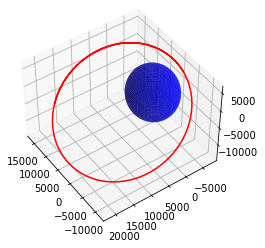

interactive(children=(FloatSlider(value=5.0, description='time', max=5.0, min=1.0, step=0.5), Output()), _dom_…

Text(0.12130862493174134, -0.015125002430479073, 'Z [km]')

In [89]:
# Setting up Spherical Earth to Plot
N = 50
phi = np.linspace(0, 2 * np.pi, N)
theta = np.linspace(0, np.pi, N)
theta, phi = np.meshgrid(theta, phi)

r_Earth = 6378.14  # Average radius of Earth
X_Earth = r_Earth * np.cos(phi) * np.sin(theta)
Y_Earth = r_Earth * np.sin(phi) * np.sin(theta)
Z_Earth = r_Earth * np.cos(theta)

# Plotting Earth and Orbit
fig1 = plt.figure()
ax1 = plt.axes(projection='3d')
ax1.plot_surface(X_Earth, Y_Earth, Z_Earth, color='blue', alpha=0.7)
ax1.plot3D(x_sat1, y_sat1, z_sat1, 'red')
ax1.view_init(45, 145)

ax1.set_xlabel('X [km]')
ax1.set_ylabel('Y [km]')
ax1.set_zlabel('Z [km]')


Add a satellite that simulate three-body problem

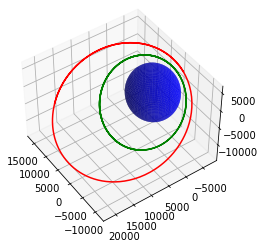

In [78]:
# Initial Conditions for the second satellite
x02 = -2500  # [km]
y02 = -5500  # [km]
z02 = 4000  # [km]
vx_02 = 7.5  # [km/s]
vy_02 = 0.  # [km/s]
vz_02 = 4.  # [km/s]
state_02 = [x02, y02, z02, vx_02, vy_02, vz_02]
orb2=Orbit(state_02)

sol2 = orb2.solve_ode(t)
x_sat2 = sol2[:, 0]
y_sat2 = sol2[:, 1]
z_sat2 = sol2[:, 2]

# Plotting Earth and Orbit
fig2 = plt.figure()
ax2 = plt.axes(projection='3d')
ax2.plot_surface(X_Earth, Y_Earth, Z_Earth, color='blue', alpha=0.7)
ax2.plot3D(x_sat1, y_sat1, z_sat1, 'red')
ax2.plot3D(x_sat2, y_sat2, z_sat2, 'green')
ax2.view_init(45, 145)  # Changing viewing angle

As we can see the energy is changing overtime.

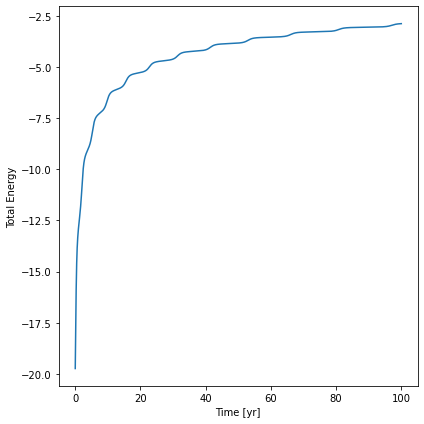

In [71]:
orb1.euler_Energy()

Using the leapfrog method, we can see the energy is conserved here.

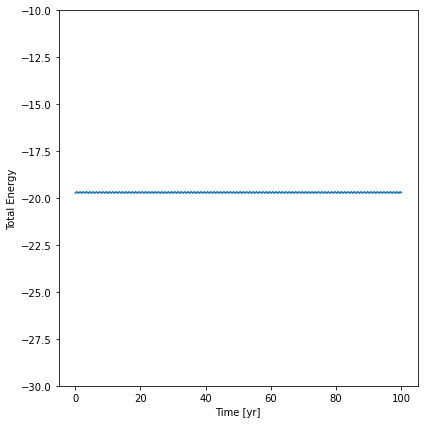

In [64]:
orb1.leapfrog_Energy()